In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

## Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The x-axis should display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.
Hint: In a setting with two classes, ˆpm1 = 1 − ˆpm2. You could make this plot by hand, but it will be much easier to make in R

C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_7352\2031397661.py:17: RuntimeWarning: divide by zero encountered in log2
  entropy = - (p_hat_m1_values * np.log2(p_hat_m1_values) + p_hat_m2_values * np.log2(p_hat_m2_values))
C:\Users\Tara Grey\AppData\Local\Temp\ipykernel_7352\2031397661.py:17: RuntimeWarning: invalid value encountered in multiply
  entropy = - (p_hat_m1_values * np.log2(p_hat_m1_values) + p_hat_m2_values * np.log2(p_hat_m2_values))


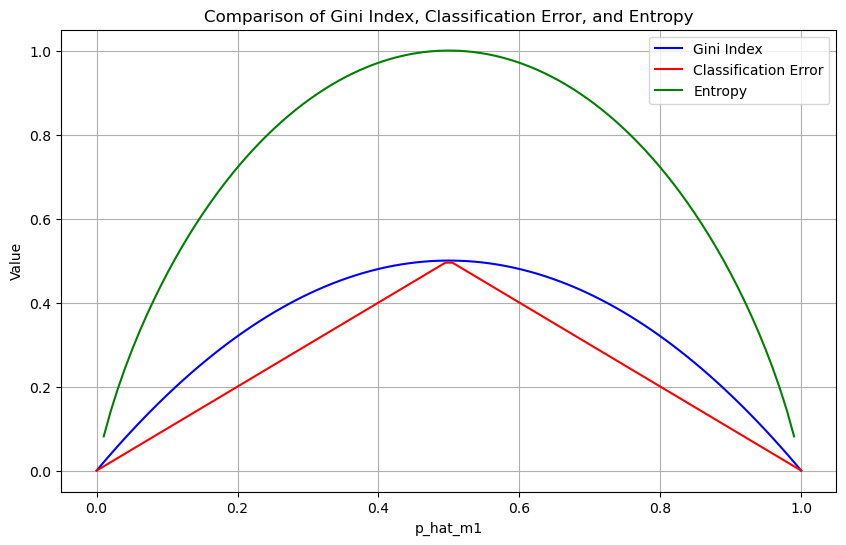

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of p_hat_m1 values from 0 to 1
p_hat_m1_values = np.linspace(0, 1, 100)

# Calculate p_hat_m2 values
p_hat_m2_values = 1 - p_hat_m1_values

# Calculate Gini index
gini_index = 2 * p_hat_m1_values * p_hat_m2_values

# Calculate classification error
classification_error = 1 - np.maximum(p_hat_m1_values, p_hat_m2_values)

# Calculate entropy
entropy = - (p_hat_m1_values * np.log2(p_hat_m1_values) + p_hat_m2_values * np.log2(p_hat_m2_values))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(p_hat_m1_values, gini_index, label='Gini Index', color='blue')
plt.plot(p_hat_m1_values, classification_error, label='Classification Error', color='red')
plt.plot(p_hat_m1_values, entropy, label='Entropy', color='green')

plt.xlabel('p_hat_m1')
plt.ylabel('Value')
plt.title('Comparison of Gini Index, Classification Error, and Entropy')
plt.legend()
plt.grid(True)
plt.show()


## Problem 8

## In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [95]:
Carseats = pd.read_csv('Carseats.csv')
Carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [96]:
Carseats['Urban']     = Carseats.Urban.map({'No':0, 'Yes':1})
Carseats['US']        = Carseats.US.map({'No':0, 'Yes':1})
Carseats['ShelveLoc'] = pd.factorize(Carseats.ShelveLoc)[0]
Carseats              = Carseats.drop('Unnamed: 0', axis=1)

(a) Split the data set into a training set and a test set.

In [97]:
x = Carseats.drop(['Sales'], axis=1)
y = Carseats['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.5, random_state=1)

(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [98]:
tree_carseats = DecisionTreeRegressor()
tree_carseats.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [99]:
ypred = tree_carseats.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.8027365


(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

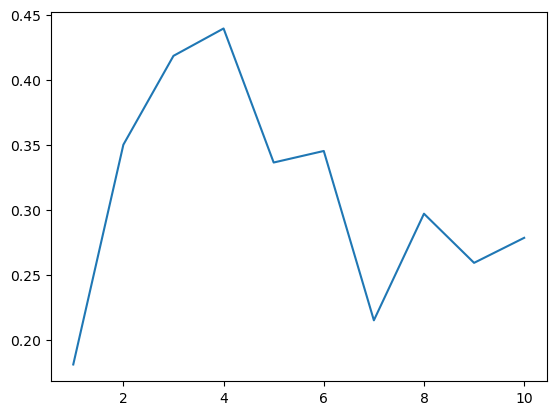

In [100]:
depth = []
for i in range(1,11):
    cv_tree = DecisionTreeRegressor(max_depth=i)
    scores  = cross_val_score(estimator=cv_tree, X=xtrain, y=ytrain, cv=10) # 10-fold CV
    depth.append(scores.mean())
plt.plot(range(1,11), depth)


In [24]:
pruned_tree_carseats = DecisionTreeRegressor(max_depth=depth.index(max(depth))+1)
pruned_tree_carseats.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [49]:
ypred = pruned_tree_carseats.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.034340234974819


- Yes, pruning the tree did increase the MSE from 6.019 to 5.034

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the feature_importance_ values to
determine which variables are most important.

In [101]:
bag_carseats = RandomForestRegressor(max_features=len(xtrain.columns), random_state=2)
bag_carseats.fit(xtrain, ytrain)

RandomForestRegressor(max_features=10, random_state=2)

In [102]:
ypred = bag_carseats.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.980634223999999


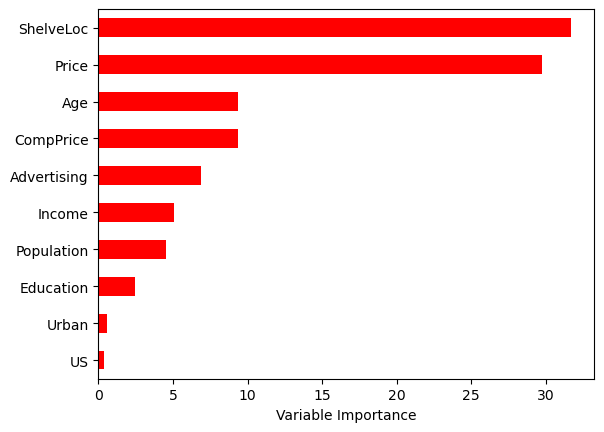

In [103]:
Importance = pd.DataFrame({'Importance':bag_carseats.feature_importances_*100}, index=xtrain.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

- The most important variables are price and shelveloc

(e) Use random forests to analyze this data. What test MSE do
you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the
number of variables considered at each split, on the error rate
obtained.

In [104]:
mse = np.zeros(10)
for i in range(0,10):
    rf_carseats = RandomForestRegressor(max_features=i+1, random_state=2)
    rf_carseats.fit(xtrain, ytrain)
    ypred  = rf_carseats.predict(xtest)
    mse[i] = mean_squared_error(ytest, ypred)

Text(0, 0.5, 'test MSE')

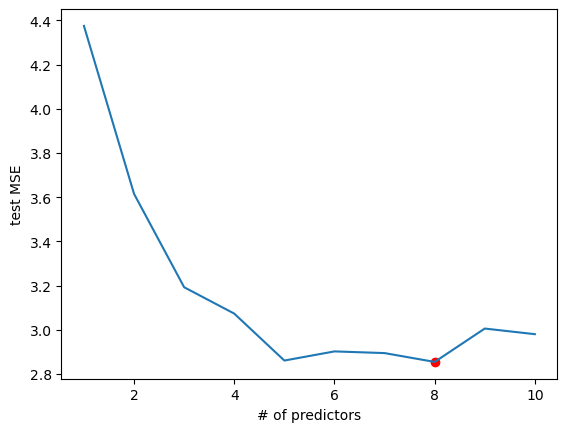

In [105]:
plt.plot(range(1,11), mse)
plt.scatter(mse.argmin()+1, min(mse), color='r')
plt.xlabel('# of predictors')   
plt.ylabel('test MSE')

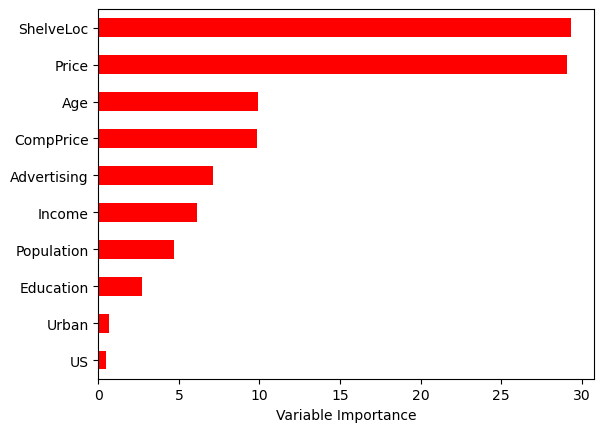

In [106]:
rf_carseats = RandomForestRegressor(max_features=mse.argmin()+1, random_state=2)
rf_carseats.fit(xtrain, ytrain)
Importance = pd.DataFrame({'Importance':rf_carseats.feature_importances_*100}, index=xtrain.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None


- The optiam number of predictors is 8 and the most important varibles are price and shelveloc the same as before.

(f) Now analyze the data using BART, and report your results.

In [107]:
bart_carseats = RandomForestRegressor(n_estimators=100, random_state=3) # BART is an ensemble method like RandomForest
bart_carseats.fit(xtrain, ytrain)

RandomForestRegressor(random_state=3)

In [108]:
ypred = bart_carseats.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error (MSE) of BART model:", mse)

Mean Squared Error (MSE) of BART model: 2.8295157476


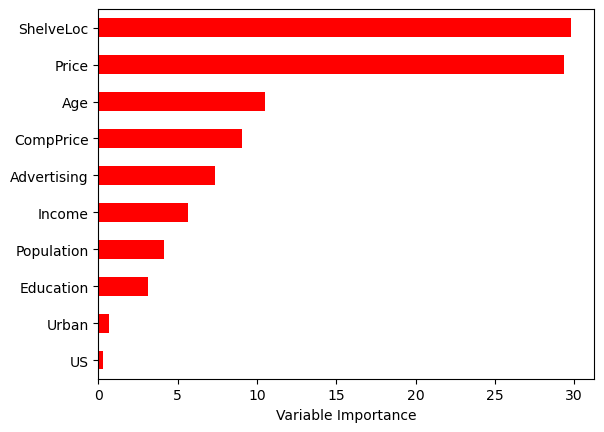

In [46]:
importance = pd.DataFrame({'Importance': bart_carseats.feature_importances_ * 100}, index=xtrain.columns)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

## Results:
- The MSE was 2.829 and the two most important variables are ShelveLoc and Price, which is same as the last two models

## Problem 9

## This problem involves the OJ data set which is part of the ISLP package.

In [51]:
OJ = pd.read_csv('https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/OJ.csv').drop('Unnamed: 0', axis=1)
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [52]:
OJ['Purchase'] = pd.factorize(OJ.Purchase)[0]
OJ['Store7']   = OJ.Store7.map({'No':0, 'Yes':1})

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [53]:
x = OJ.drop(['Purchase'], axis=1)
y = OJ['Purchase']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=800, random_state=1)

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

In [55]:
tree_oj = DecisionTreeClassifier(max_depth=3)
tree_oj.fit(xtrain, ytrain)
print('Training error rate: %.2f' %(1-tree_oj.score(xtrain, ytrain))) 

Training error rate: 0.15


## Report:
    - The tree has a 15% training error rate

(c) Create a plot of the tree, and interpret the results. How many
terminal nodes does the tree have?

In [56]:
n_nodes        = tree_oj.tree_.node_count
children_left  = tree_oj.tree_.children_left
children_right = tree_oj.tree_.children_right
feature        = tree_oj.tree_.feature
threshold      = tree_oj.tree_.threshold


In [60]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves  = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id]   = parent_depth + 1
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has the following tree structure:" %n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%i leaf node." %(node_depth[i] * "\t", i))
    else:
        print("%snode=%i test node: go to node %i if X[:, %i] <= %.2f else to node %i."
              %(node_depth[i] * "\t", i, children_left[i], feature[i], threshold[i], children_right[i],))

print('# of terminal nodes: %i' %sum(is_leaves))

The binary tree structure has 15 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 8] <= 0.45 else to node 8.
	node=1 test node: go to node 2 if X[:, 8] <= 0.28 else to node 5.
		node=2 test node: go to node 3 if X[:, 8] <= 0.05 else to node 4.
			node=3 leaf node.
			node=4 leaf node.
		node=5 test node: go to node 6 if X[:, 6] <= 0.50 else to node 7.
			node=6 leaf node.
			node=7 leaf node.
	node=8 test node: go to node 9 if X[:, 8] <= 0.75 else to node 12.
		node=9 test node: go to node 10 if X[:, 11] <= -0.16 else to node 11.
			node=10 leaf node.
			node=11 leaf node.
		node=12 test node: go to node 13 if X[:, 11] <= -0.39 else to node 14.
			node=13 leaf node.
			node=14 leaf node.
# of terminal nodes: 8


## Report:
- The tree has 8 terminal nodes

(d) Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [62]:
tree_oj = DecisionTreeClassifier(max_depth=3)
tree_oj.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [65]:
from sklearn.tree import export_text
tree_summary = export_text(tree_oj, feature_names=list(x.columns))
print(tree_summary)

|--- LoyalCH <= 0.45
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.05
|   |   |   |--- class: 1
|   |   |--- LoyalCH >  0.05
|   |   |   |--- class: 1
|   |--- LoyalCH >  0.28
|   |   |--- SpecialCH <= 0.50
|   |   |   |--- class: 1
|   |   |--- SpecialCH >  0.50
|   |   |   |--- class: 0
|--- LoyalCH >  0.45
|   |--- LoyalCH <= 0.75
|   |   |--- PriceDiff <= -0.16
|   |   |   |--- class: 1
|   |   |--- PriceDiff >  -0.16
|   |   |   |--- class: 0
|   |--- LoyalCH >  0.75
|   |   |--- PriceDiff <= -0.39
|   |   |   |--- class: 0
|   |   |--- PriceDiff >  -0.39
|   |   |   |--- class: 0



## Report: 
- The first terminal node where LoyalCH is less then or equal to 0.45 above represents a desision point based on the features of'LoyalCH' and 'SpecialCH'. 
- This terminal node represents a decision point where customers with loyalty to SpeicalCH is less than or equal to 0.45 are classified based on their loyalty level adn response to special promotions.


(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [67]:
ypred = tree_oj.predict(xtest)
cmat  = pd.DataFrame(confusion_matrix(ytest, ypred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(cmat)

      No  Yes
No   139   31
Yes   18   82


In [78]:
Test_error_rate =((31+18)/270)*100
print(Test_error_rate)

18.14814814814815


(f) Use cross-validation on the training set in order to determine
the optimal tree size.

In [80]:
depth = np.zeros(10)
for i in range(1,11):
    cv_tree    = DecisionTreeClassifier(max_depth=i)
    scores     = cross_val_score(estimator=cv_tree, X=xtrain, y=ytrain, cv=10) # 10-fold CV
    depth[i-1] = scores.mean()
print('optimal depth: %i' %(depth.argmax()+1))

optimal depth: 4


## Report:
- The optimal tree size is 4

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

Text(0, 0.5, 'cv error rate')

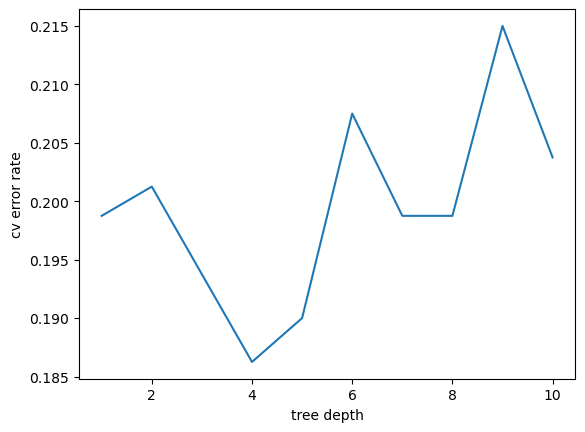

In [81]:
plt.plot(range(1,11), 1-depth)
plt.xlabel('tree depth')
plt.ylabel('cv error rate')

(h) Which tree size corresponds to the lowest crossvalidated classification error rate?

- Tree depth of 4 corresponds to the lowest crossvalidated classification error rate.

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes

In [83]:
pruned_tree_oj = DecisionTreeClassifier(max_depth=depth.argmax()+1)
pruned_tree_oj.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

(j) Compare the training error rates between the pruned and un-
pruned trees. Which is higher?

In [84]:
unpruned_tree_oj = DecisionTreeClassifier()
unpruned_tree_oj.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [85]:
print('unpruned training error rate: %.2f' %(1-unpruned_tree_oj.score(xtrain, ytrain))) 
print('pruned training error rate: %.2f' %(1-pruned_tree_oj.score(xtrain, ytrain)))

unpruned training error rate: 0.01
pruned training error rate: 0.15


- The Pruned tree has a 15% training error rate versus the unpurned tree with a training error of only 1%. 
- Meaning the Pruned tree has a higher error rate compared to the unpurned tree.

(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

In [86]:
ypred = unpruned_tree_oj.predict(xtest)
cmat1 = pd.DataFrame(confusion_matrix(ytest, ypred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(cmat1)

      No  Yes
No   131   42
Yes   26   71


In [92]:
Tree_Test_Error_Rate = (41+24)/270
print(Tree_Test_Error_Rate*100)

24.074074074074073


In [88]:
ypred = pruned_tree_oj.predict(xtest)
cmat2 = pd.DataFrame(confusion_matrix(ytest, ypred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(cmat2)

      No  Yes
No   139   33
Yes   18   80


In [93]:
Tree_Test_Error_Rate = (33+18)/270
print(Tree_Test_Error_Rate*100)

18.88888888888889


- The unpurned tree has a test error rate of 24% which is higher then the purned trees error rate which was 18.9%